### Imports and Configurations

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
np.random.seed(42)

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read Data

In [2]:
extracted_features_path = '/content/drive/MyDrive/MLDL23/extracted features/P08/test/uniform/D1_test_uniform_D1_test.pkl'
train_vals_path = '/content/drive/MyDrive/MLDL23/train_vals/D1_test.pkl'

# Load the data from the pickle file
with open(extracted_features_path, 'rb') as file:
    data1 = pickle.load(file)

# Load the data from the pickle file
with open(train_vals_path, 'rb') as file:
    data2 = pickle.load(file)

df1 = pd.DataFrame(data1['features'])
df2 = pd.DataFrame(data2)


# Merge dataframes based on the "uid" column
merged_dataframe = pd.merge(df1, df2, on="uid", how="inner")
columns_to_remove = ["participant_id", "video_id"]
columns2_to_remove = ["video_name","participant_id", "video_id","narration",	"start_timestamp",	"stop_timestamp",	"start_frame",	"stop_frame", "verb"]

merged_dataframe1 = merged_dataframe.drop(columns=columns2_to_remove)

merged_dataframe2 = merged_dataframe.drop(columns=columns_to_remove)

### Display Data

In [3]:
df = merged_dataframe1
df

,uid,features_RGB,verb_class
0,13744,"[[0.10078726, 0.45512, 0.14742485, 0.17402512,...",0
1,13747,"[[0.104403414, 0.07300105, 0.17237487, 0.28048...",4
2,13748,"[[0.17538485, 0.029471783, 0.33066574, 0.17496...",7
3,13749,"[[0.12508923, 0.2824604, 0.5454524, 0.24330871...",0
4,13751,"[[0.30747718, 0.0422991, 0.38418937, 0.0376957...",4
...,...,...,...
430,14431,"[[0.11635426, 0.0, 0.41014212, 0.01234618, 0.1...",4
431,14432,"[[0.2880178, 0.06559036, 0.15245229, 0.1551841...",1
432,14433,"[[0.2673539, 0.3871655, 0.49116585, 0.6675695,...",3
433,14434,"[[0.20000115, 0.12088862, 0.08204682, 0.101484...",3


In [4]:
merged_dataframe2

,uid,video_name,features_RGB,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class
0,13744,P08_09,"[[0.10078726, 0.45512, 0.14742485, 0.17402512,...",get mocha pot,00:00:02.61,00:00:03.61,156,216,get,0
1,13747,P08_09,"[[0.104403414, 0.07300105, 0.17237487, 0.28048...",clean mocha,00:00:09.66,00:00:10.16,579,609,clean,4
2,13748,P08_09,"[[0.17538485, 0.029471783, 0.33066574, 0.17496...",pour water,00:00:10.26,00:00:12.19,615,731,pour,7
3,13749,P08_09,"[[0.12508923, 0.2824604, 0.5454524, 0.24330871...",get filter,00:00:14.11,00:00:15.61,846,936,get,0
4,13751,P08_09,"[[0.30747718, 0.0422991, 0.38418937, 0.0376957...",clean coffee filter,00:00:19.63,00:00:28.67,1177,1720,clean,4
...,...,...,...,...,...,...,...,...,...,...
430,14431,P08_17,"[[0.11635426, 0.0, 0.41014212, 0.01234618, 0.1...",wipe off pan,00:09:27.87,00:09:30.48,34072,34228,wipe-off,4
431,14432,P08_17,"[[0.2880178, 0.06559036, 0.15245229, 0.1551841...",place pan,00:09:31.76,00:09:36.15,34305,34569,place,1
432,14433,P08_17,"[[0.2673539, 0.3871655, 0.49116585, 0.6675695,...",close drawer,00:09:36.88,00:09:38.15,34612,34689,close,3
433,14434,P08_17,"[[0.20000115, 0.12088862, 0.08204682, 0.101484...",close dishwasher,00:09:38.30,00:09:39.77,34698,34786,close,3


# PCA

### Prepare Data

In [5]:
features = df['features_RGB']

new_features = []
for feat in features:
    concatenated_features = np.concatenate([feat[i] for i in range(len(feat))])
    new_features.append(concatenated_features)
X = np.vstack(new_features)
y = np.array(df["verb_class"])

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (435, 5120)
Shape of y: (435,)


### Apply Scalers

In [6]:
# Apply Standard Scaler
standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)

# Apply Min-Max Scaler
minmax_scaler = MinMaxScaler()
X_mm = minmax_scaler.fit_transform(X)

### Apply PCA

In [7]:
# Create a PCA object with all components
pca = PCA(n_components=0.9)

# Fit the PCA model to the original data
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variances_original = np.cumsum(pca.explained_variance_ratio_)

# Fit the PCA model to the standardized data
pca.fit(X_std)

# Calculate cumulative explained variance
cumulative_variances_standardized = np.cumsum(pca.explained_variance_ratio_)

# Fit the PCA model to the min-max scaled data
pca.fit(X_mm)

# Calculate cumulative explained variance
cumulative_variances_minmax = np.cumsum(pca.explained_variance_ratio_)


X_pca = pca.fit_transform(X)
X_pca_mm = pca.fit_transform(X_mm)
X_pca_std = pca.fit_transform(X_std)

### Plot: Cumulative Explained Variance

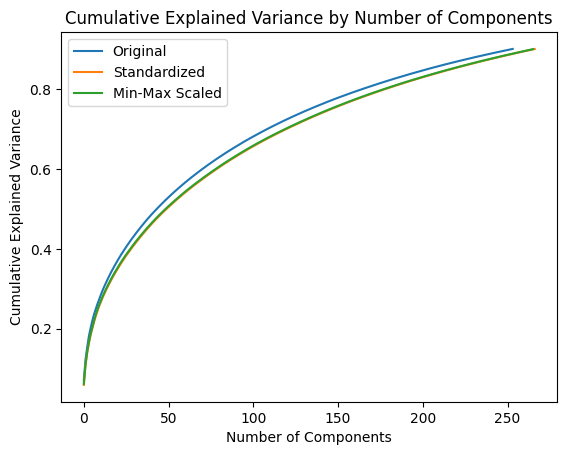

In [8]:
plt.plot(cumulative_variances_original, label='Original')
plt.plot(cumulative_variances_standardized, label='Standardized')
plt.plot(cumulative_variances_minmax, label='Min-Max Scaled')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.legend()
plt.show()

# Metrics

## Function

In [9]:
def evaluate_clustering_metrics(data, predicted_labels, true_labels, kmeans):

    # Silhouette Score
    silhouette_avg = silhouette_score(data, predicted_labels)

    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data, predicted_labels)

    # Calinski-Harabasz Index (Variance Ratio Criterion)
    calinski_harabasz = calinski_harabasz_score(data, predicted_labels)

    # Adjusted Rand Index
    ari = adjusted_rand_score(true_labels, predicted_labels)

    # Normalized Mutual Information
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)

    # Homogeneity, Completeness, and V-measure
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, predicted_labels)

    metrics = {
        "Silhouette Score": silhouette_avg,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Adjusted Rand Index": ari,
        "Normalized Mutual Information": nmi,
        "Homogeneity": homogeneity,
        "Completeness": completeness,
        "V-measure": v_measure
    }

    return metrics


## Original Data

In [10]:
kmeans_original = KMeans(n_clusters=8, random_state=42, n_init='auto')
labels_pred_original = kmeans_original.fit_predict(X_pca)

metrics_original = evaluate_clustering_metrics(X_pca, labels_pred_original, y, kmeans_original)
for metric_name, value in metrics_original.items():
    print(f"{metric_name}: {value}")

Silhouette Score: 0.041155461221933365
Davies-Bouldin Index: 2.7517539199025567
Calinski-Harabasz Index: 11.519580215270402
Adjusted Rand Index: 0.13681906304566951
Normalized Mutual Information: 0.2703064341722431
Homogeneity: 0.24590376579960205
Completeness: 0.30008596280086053
V-measure: 0.2703064341722431


## Min Max Scaled Data

In [11]:
kmeans_mm = KMeans(n_clusters=8, random_state=42, n_init='auto')
labels_pred_mm = kmeans_original.fit_predict(X_pca_mm)

metrics_mm = evaluate_clustering_metrics(X_pca_mm, labels_pred_mm, y, kmeans_mm)
for metric_name, value in metrics_mm.items():
    print(f"{metric_name}: {value}")

Silhouette Score: 0.019118856638669968
Davies-Bouldin Index: 3.507107518783095
Calinski-Harabasz Index: 8.941544613661758
Adjusted Rand Index: 0.07855262340669743
Normalized Mutual Information: 0.22566055627339568
Homogeneity: 0.21150460111231742
Completeness: 0.2418473443855343
V-measure: 0.22566055627339568


## Standard Scaled Data

In [12]:
kmeans_std = KMeans(n_clusters=8, random_state=42, n_init='auto')
labels_pred_std = kmeans_original.fit_predict(X_pca_std)

metrics_std = evaluate_clustering_metrics(X_pca_std, labels_pred_std, y, kmeans_std)
for metric_name, value in metrics_std.items():
    print(f"{metric_name}: {value}")

Silhouette Score: 0.024008069187402725
Davies-Bouldin Index: 3.8002983943072195
Calinski-Harabasz Index: 10.610362397444874
Adjusted Rand Index: 0.10143330105410663
Normalized Mutual Information: 0.24241781861065972
Homogeneity: 0.24337564865965758
Completeness: 0.24146749828491068
V-measure: 0.24241781861065972


# Analytics

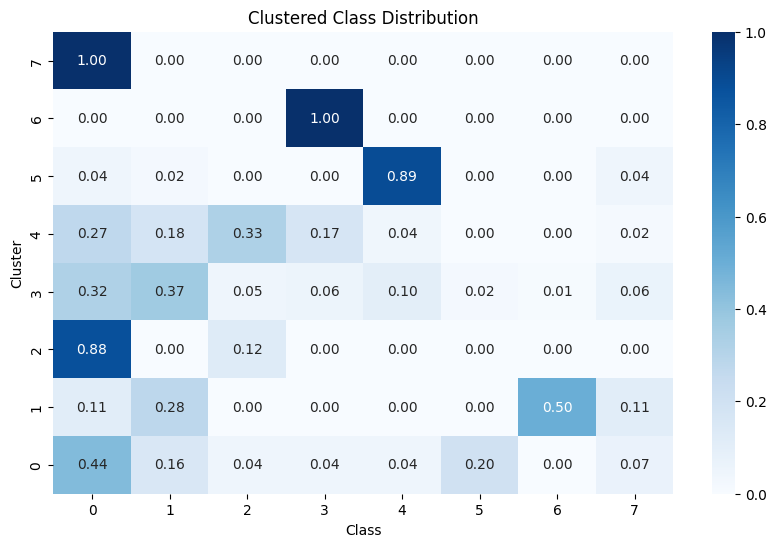

In [13]:
# Assuming 'cluster_labels' contains the cluster labels assigned by KMeans
# and 'original_labels' contains the true labels of your data
clustered_data = pd.DataFrame({'Cluster (Predicted)': labels_pred_original, 'Class (Original)': y})

# Count the occurrences of each class in each cluster
cluster_class_counts = clustered_data.groupby(['Cluster (Predicted)', 'Class (Original)']).size().unstack(fill_value=0)

# Normalize the counts to get distribution percentages
cluster_class_distribution = cluster_class_counts.div(cluster_class_counts.sum(axis=1), axis=0)
# Invert the order of y-axis labels
cluster_class_distribution = cluster_class_distribution.iloc[::-1]

# Plot the distribution using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_class_distribution, annot=True, cmap='Blues', fmt=".2f")
plt.title('Clustered Class Distribution')
plt.xlabel('Class')
plt.ylabel('Cluster')
plt.show()

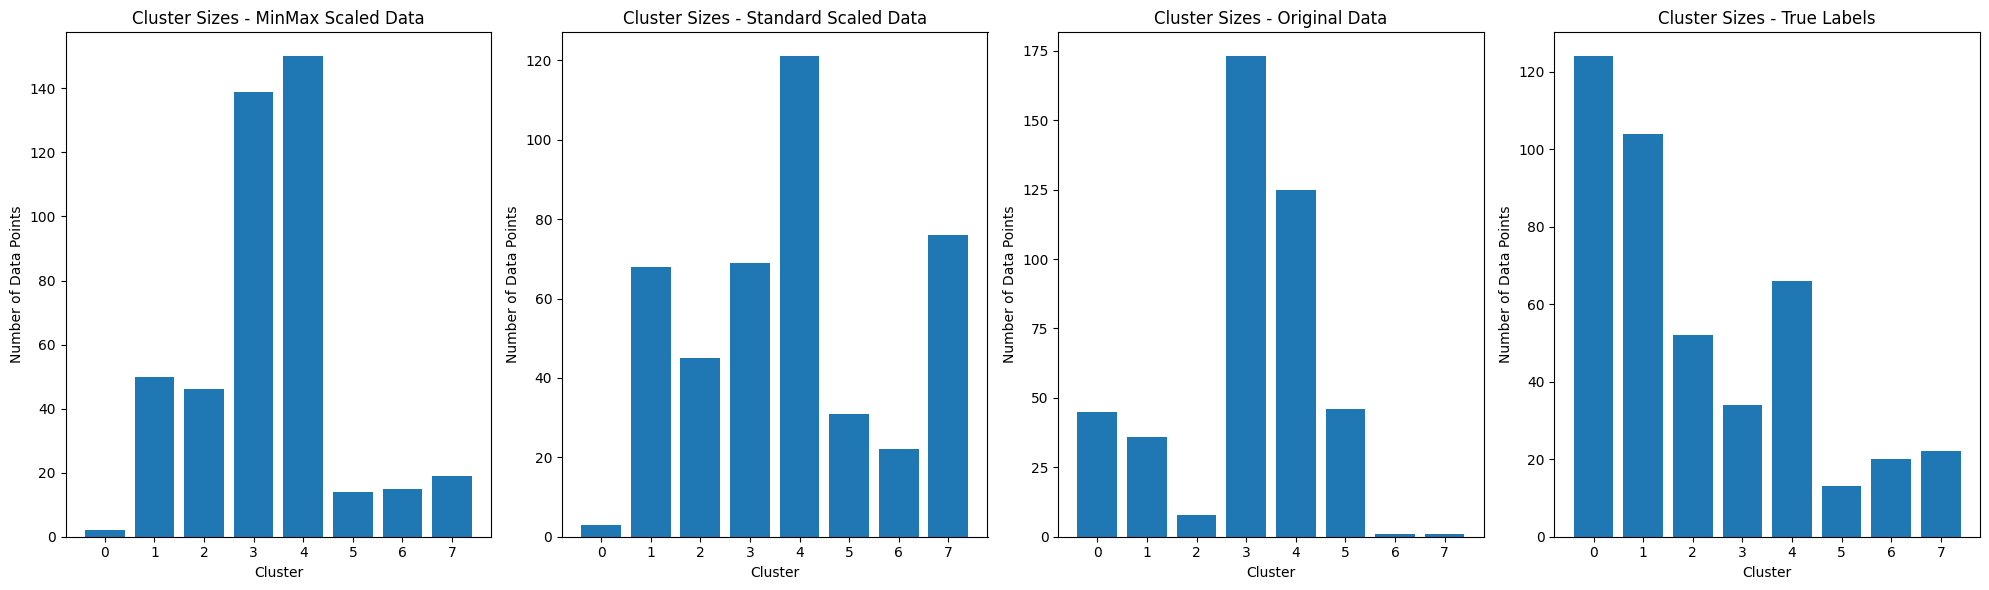

In [14]:
def plot_cluster_sizes_subplots(cluster_labels_list, dataset_names):
    num_datasets = len(cluster_labels_list)
    fig, axes = plt.subplots(1, num_datasets, figsize=(20, 6))

    for i, (cluster_labels, dataset_name) in enumerate(zip(cluster_labels_list, dataset_names)):
        unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)
        axes[i].bar(unique_clusters, cluster_counts)
        axes[i].set_title(f'Cluster Sizes - {dataset_name}')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('Number of Data Points')

    plt.tight_layout()
    plt.show()

cluster_labels_list = [labels_pred_mm, labels_pred_std, labels_pred_original, y]
dataset_names = ['MinMax Scaled Data', 'Standard Scaled Data', 'Original Data','True Labels']

plot_cluster_sizes_subplots(cluster_labels_list, dataset_names)
